
# Gathering the Data

# 1. Read input files

In [60]:
import time
import math
import pandas as pd
from Database.services.database import Database
from sqlalchemy import inspect
from services.data_retreival import *
from scipy.stats import gmean
import matplotlib.pyplot as plt
from services.strategies import *
from services.optimization_layers import *
from services.data_utils import *

Database.initialize("sqlite:///Database//financial_db.sqlite") #for courses replace this with a flat file
inspector = inspect(Database.engine)
print(inspector.get_table_names())

#get tickers that are in tiingo and GFD
ticker_info = Database.query("SELECT a.* from tiingo_tickers a "
                             "where a.exchange in ('NYSE', 'NYSE ARCA') and a.assetType = 'ETF'"
                             "and a.endDate = '2023-04-21 00:00:00.000000' and a.startDate < '2005-01-01 00:00:00.000000'")

['asset_id', 'currency_id', 'equities_series', 'equity_index_id', 'exchange_id', 'factor_id', 'factors', 'frequency_id', 'fundamentals', 'metric_id', 'source_id', 'ticker_id', 'ticker_index_membership', 'tiingo_tickers']


In [61]:
universe = 'ETF'

In [62]:
#find a valid time period for the assets
startDate = ticker_info.startDate.min()
endDate = ticker_info.endDate.min()
ticker_info['ticker_currency'] = ticker_info.ticker + "-" + ticker_info.priceCurrency

In [63]:
tickers = tuple(ticker_info.ticker.unique())
len(ticker_info['ticker_currency'].unique())
len(tickers)

339

In [13]:
#hack not in DB
from Database.services.dataloading import *

i = 1
dfs = []
for name, group in ticker_info.groupby('ticker'):
    #find a valid time period for the assets
    startDate = group.startDate.min()
    endDate = group.endDate.max()
    group = group.iloc[:1]
    group = group[['ticker', 'priceCurrency']]
    group['ticker_currency'] = group.ticker + "-" + group.priceCurrency

    try:
        df_tiingo = retrieve_tiingo(startDate, endDate, group)
        dfs.append(df_tiingo)
    except:
        print("tiingo failed ticker "+name)
    i += 1
    if i %50 == 0:
        print("tickers completed ", i)

C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  50


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  100


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tiingo failed ticker IGN


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  150


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  200


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  250


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

tickers completed  300


C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\david\anaconda3\envs\svmmvo\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._c

In [14]:
data = pd.concat(dfs, axis = 0)

In [15]:
data.to_pickle('flat_files/etf_data.pkl')

In [64]:
data = pd.read_pickle('flat_files/etf_data.pkl')

In [65]:
adjClose = data[['date', 'ticker', 'adjClose']].pivot(index='date', columns=['ticker'], values=['adjClose'])
adjVolume = data[['date', 'ticker', 'adjVolume']].pivot(index='date', columns=['ticker'], values=['adjVolume'])
monthly_adjClose = adjClose.groupby(pd.Grouper(freq="M")).last()

<AxesSubplot:xlabel='date'>

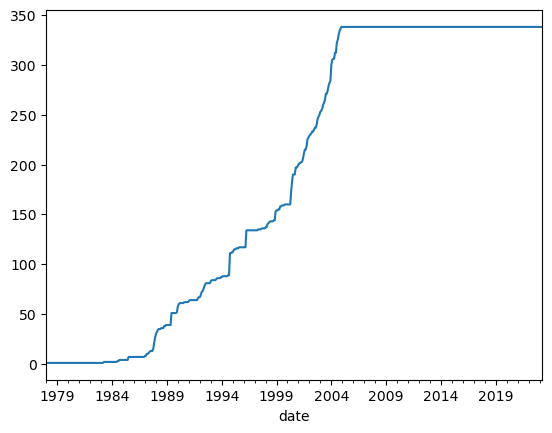

In [66]:
(~monthly_adjClose.isna()).sum(axis = 1).plot()

In [67]:
dates_idx = (~monthly_adjClose.isna()).sum(axis = 1) >= 300
data_start_date = dates_idx[dates_idx].index[0]
number_of_missing = monthly_adjClose[dates_idx].isna().sum(axis = 0)
clean_tickers = number_of_missing[number_of_missing == 0]

print("Number of tickers with no monthly observations missing ", len(clean_tickers))
print("Number of monthly dates ", sum(dates_idx))

Number of tickers with no monthly observations missing  300
Number of monthly dates  232


# Filter out tickers that have data issues
# RECS ETF has incorrect prices

In [101]:
bad_ticker = (np.abs(adjClose.diff().dropna()) <= 0.001).sum().sort_values().index[-1][1]

In [102]:
idx = pd.IndexSlice
filtered_cols_idx = idx[:, [col for col in clean_tickers.index.get_level_values('ticker') if col != bad_ticker]]
monthly_adjClose_phase1 = monthly_adjClose.loc[dates_idx, filtered_cols_idx]
monthly_adjusted_volumes_phase1 = monthly_adjClose.loc[dates_idx,  filtered_cols_idx]

In [103]:
daily_out_phase1 = adjClose.loc[adjClose.index > data_start_date, filtered_cols_idx]
daily_adjusted_volumes_phase1 = adjVolume.loc[adjVolume.index > data_start_date, filtered_cols_idx]

In [104]:
bad_ticker

'RECS'

                                  adjClose
date                      ticker          
2008-10-13 00:00:00+00:00 PFD     0.744681
                          FFC     0.577726
2010-05-07 00:00:00+00:00 IWS     0.475123
2008-10-13 00:00:00+00:00 FLC     0.452328
                          JPS     0.444386
                          MPV     0.443478
                          HPF     0.435630
                          HPS     0.432119
                          NCV     0.426190
                          PFO     0.425781
                          RNP     0.417460
2020-03-18 00:00:00+00:00 VVR     0.409938
2008-10-13 00:00:00+00:00 PCN     0.407056
                          RQI     0.403346
2008-10-14 00:00:00+00:00 PFD     0.398374
2020-03-19 00:00:00+00:00 VVR     0.394737
2008-10-13 00:00:00+00:00 GUT     0.393733
2010-05-07 00:00:00+00:00 IGM     0.386255
2008-10-13 00:00:00+00:00 HPI     0.380208
                          JRS     0.363636


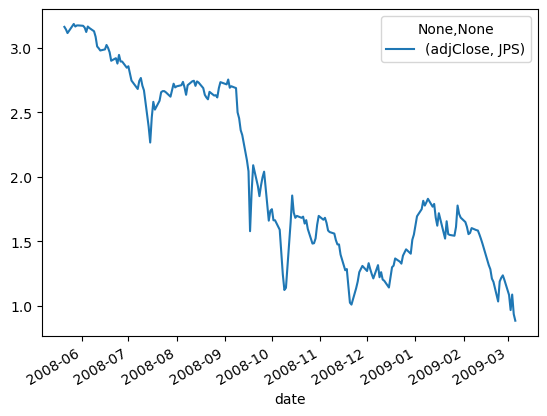

In [105]:
k = 20
top_k_returns = daily_out_phase1.pct_change(1).dropna().stack().abs().sort_values(by = 'adjClose', ascending = False).iloc[:k]
date, ticker = top_k_returns.index[4]

show_data_around_time(daily_out_phase1, ticker, date, pds = 100)

tickers_that_are_too_vol = top_k_returns.index.get_level_values('ticker').unique()

print(top_k_returns)

In [106]:
#no nans
monthly_adjClose_phase1.isna().sum().sum()

0

In [107]:
daily_out_phase1.index[daily_out_phase1.loc[:,('adjClose', 'BHV')].isna()]

DatetimeIndex(['2006-02-10 00:00:00+00:00', '2006-03-13 00:00:00+00:00',
               '2006-04-11 00:00:00+00:00', '2006-06-12 00:00:00+00:00',
               '2006-07-11 00:00:00+00:00', '2006-08-10 00:00:00+00:00',
               '2006-11-10 00:00:00+00:00', '2006-12-21 00:00:00+00:00',
               '2007-05-10 00:00:00+00:00', '2008-01-14 00:00:00+00:00',
               '2008-02-05 00:00:00+00:00', '2008-07-14 00:00:00+00:00',
               '2014-05-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', freq=None)

date
2007-08-21 00:00:00+00:00    8.386083
2007-08-22 00:00:00+00:00    8.386083
2007-08-23 00:00:00+00:00    8.386083
2007-08-24 00:00:00+00:00    8.386083
2007-08-27 00:00:00+00:00    8.386083
                               ...   
2008-05-30 00:00:00+00:00    9.120759
2008-06-02 00:00:00+00:00    9.320840
2008-06-03 00:00:00+00:00    9.335480
2008-06-04 00:00:00+00:00    9.320840
2008-06-05 00:00:00+00:00    9.335480
Name: (adjClose, BHV), Length: 200, dtype: float64

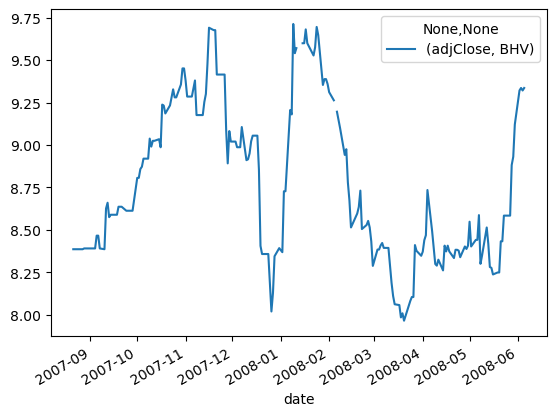

In [108]:
show_data_around_time(daily_out_phase1, 'BHV', '2008-01-14 00:00:00+00:00', pds = 100)

In [109]:
monthly_adjClose_phase1.div(monthly_adjClose_phase1.iloc[0]).iloc[-1].sort_values()

          ticker
adjClose  OIH       0.844727
          CEE       0.861052
          PYN       1.312134
          EWI       1.403433
          NOM       1.448287
                      ...   
          GF        7.351692
          IGM       7.705396
          IYW       8.309190
          XLK       9.102672
          VGT       9.156347
Name: 2023-04-30 00:00:00+00:00, Length: 299, dtype: float64

# interpolate missing values

In [110]:
daily_out_phase2 = daily_out_phase1.interpolate(axis = 0)
daily_adjusted_volumes_phase2 = daily_adjusted_volumes_phase1.interpolate(axis = 0)

In [111]:
monthly_adjClose_phase1.to_csv("flat_files/MonthlyAssetPrices"+universe +".csv")
daily_out_phase2.to_csv("flat_files/DailyAssetPrices"+universe +".csv")

# Technicals Volume and Price

In [112]:
# construct the earliest possible test start date
k_values = [20, 40, 60, 120, 250, 500]
k_max = max(k_values)
monthly_dates = monthly_adjClose_phase1.index[monthly_adjClose_phase1.index >= daily_out_phase1.index[k_max]]

In [113]:
technical_analysis_rets = get_k_rolling_stats(daily_out_phase1.pct_change(1).dropna(), monthly_dates, k_values=k_values)

technical_analysis_volume = get_k_rolling_stats(daily_adjusted_volumes_phase1, monthly_dates, k_values=k_values)

In [114]:
technical_analysis_rets.columns = ["adjRet_"+ col for col in technical_analysis_rets.columns]
technical_analysis_volume.columns = ["adjVolume_"+ col for col in technical_analysis_volume.columns]

In [115]:
technical_analysis = pd.concat([technical_analysis_rets, technical_analysis_volume], axis = 1)

In [116]:
idx = pd.IndexSlice
technical_analysis.to_csv("flat_files/TechnicalAnalysis"+universe + ".csv")